In [254]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#Scipy Library
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
from sklearn.preprocessing import OneHotEncoder

In [255]:
patient_stay = pd.read_csv("train.csv")
train = patient_stay
train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [256]:
# Python Method 1 : Displays Data Information :

def display_data_information(data , data_types ,dataframe_name):
    print("Information of ",dataframe_name," : Rows = ",data.shape[0] , " | Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include = [VARIABLE]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type)) + " " + VARIABLE + " Features\n" + str(data_type)+"\n")

In [257]:
# Display Data Information of "patient_profile" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(patient_stay, data_types, "patient_length_of_stay")

Information of  patient_length_of_stay  : Rows =  318438  | Columns =  18 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                   

In [258]:
# Python Method 2 : Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table) :

def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "patient_stay", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(patient_stay, head_rows=3, tail_rows=2)

'Data Head & Tail :'

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [259]:
# Python Method 3 : Displays Data Description using Statistics :
def display_data_description(data , numeric_data_types = None , categorical_data_types = None):
    print("Data Description :")
    display(data.describe(include = numeric_data_types))
    print("")
    display(data.describe(include = categorical_data_types))

# Displays Train Data Description
display_data_description(patient_stay , data_types[0:4] , data_types[4:7])

Data Description :


,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


In [260]:
#Python Method 4 : Remove Data Duplicates while Retaining the First one - Similar to SQL DISTINCT :

def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep = "first" , inplace =True)
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0]) 
    return data

In [261]:
# Remove Duplicates from "train" data
train = remove_duplicate(train)

BEFORE REMOVING DUPLICATES - No. of Rows =  318438
AFTER REMOVING DUPLICATES  - No. of Rows =  318438


In [262]:
# Python Method 5 : Fills or Imputes Missing values with Various Methods : 

def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    for column in columns :
        
        # Fill Missing Values with Specific Value :
        if "Value_Fill" in fill_types :
            data[column].fillna(fill_value , inplace = True)
           #print("Value_Fill")

        # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
        if "Forward_Fill" in fill_types :
            data[ column ] = data[ column ].ffill(axis = 0)
#             print("Forward_Fill")

        # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
        if "Backward_Fill" in fill_types :
            data[ column ] = data[ column ].bfill(axis = 0)
#             print("Backward_Fill")
    
    print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())
    
    return data

In [263]:
#Filling the missing values in City Code Patient

fill_value = stats.mode(train["City_Code_Patient"] , axis =None)
fill_value = int(np.squeeze(fill_value[0])  )
print(fill_value)
fill_types = [ "Value_Fill"]
#fill_missing_values(train , fill_value ,fill_types, "City_Code_Patient" , "train")

train["City_Code_Patient"].fillna(fill_value , inplace = True)
train.isnull().sum()

8


case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                            113
patientid                              0
City_Code_Patient                      0
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    0
Admission_Deposit                      0
Stay                                   0
dtype: int64

In [264]:
train['Bed Grade'].unique()
null_indices_of_bedgrade = train[train['Bed Grade'].isnull()].index.tolist()

In [265]:
#getting uniques value of hospital code w.r.to null values of bed grade to list
list1 = train.iloc[null_indices_of_bedgrade]['Hospital_code'].unique()
list1 = list(list1)
for i in list1:
    m = train['Hospital_code'] == i
    mode_value = int(stats.mode(train.loc[m , 'Bed Grade'])[0])  
    train.loc[m , 'Bed Grade'] = train.loc[m , 'Bed Grade'].fillna(mode_value)

In [266]:
# Python Method 6 : Displays Unique Values in Each Column of the Dataframe(Table) :

def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("NULL Values :")
        print(data[ column ].isnull().sum())
        print("Value Counts :")
        print(data[column].value_counts())
        print("")

In [267]:
#Renameing some column
train=train.rename(columns={"Severity of Illness": "Severity_of_Illness", "Type of Admission": "Type_of_Admission"})

In [268]:
train.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [269]:
train=train.drop(["patientid","case_id"],axis=1)

In [270]:
columns=list(train.columns)
columns
unique=[]
for col in columns:
    uni=train[col].nunique()
    unique.append(uni)
    print(col,uni)

Hospital_code 32
Hospital_type_code 7
City_Code_Hospital 11
Hospital_region_code 3
Available Extra Rooms in Hospital 18
Department 5
Ward_Type 6
Ward_Facility_Code 6
Bed Grade 4
City_Code_Patient 37
Type_of_Admission 3
Severity_of_Illness 3
Visitors with Patient 28
Age 10
Admission_Deposit 7300
Stay 11


In [271]:
train["Stay"].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [272]:
#lable encoding of age
Stay_ordinal={ "0-10":0,
              '11-20':1,
              '21-30':2, 
              '31-40':3, 
              '41-50':4,
              '51-60':5,
              '61-70':6,
              '71-80':7,
              '81-90':8,
              '91-100':9,
              'More than 100 Days':10
}
train["Stay"]=train.Stay.map(Stay_ordinal)
train["Stay"]=train["Stay"].astype(int)
train["Stay"]

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

In [273]:
#lable encoding of age
Age_ordinal={ "0-10":0,
              '11-20':1,
              '21-30':2, 
              '31-40':3, 
              '41-50':4,
              '51-60':5,
              '61-70':6,
              '71-80':7,
              '81-90':8,
              '91-100':9,
}
train["Age"]=train.Age.map(Age_ordinal)
train["Age"]=train["Age"].astype("category")

In [274]:
#lable encoding of severity
Severity={"Moderate":0,
          "Extreme":1,
          "Minor":2,
}
train["Severity_of_Illness"]=train.Severity_of_Illness.map((Severity))
train["Severity_of_Illness"]=train["Severity_of_Illness"].astype("category")

In [275]:
#lable encoding of age Department
department={'gynecology':0,
            'anesthesia':1,
            'TB & Chest disease':2,
            'radiotherapy':3,
            'surgery':4
           }
train["Department"]=train.Department.map(department)
train["Department"]=train["Department"].astype("category")

In [276]:
#lable encoding of addmission
addmission={'Emergency':1,
           'Trauma':2,
            'Urgent':0
}
train["Type_of_Admission"]=train.Type_of_Admission.map(addmission)
train["Type_of_Admission"]=train["Type_of_Admission"].astype("category")

In [277]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Hospital_code                      318438 non-null  int64   
 1   Hospital_type_code                 318438 non-null  object  
 2   City_Code_Hospital                 318438 non-null  int64   
 3   Hospital_region_code               318438 non-null  object  
 4   Available Extra Rooms in Hospital  318438 non-null  int64   
 5   Department                         318438 non-null  category
 6   Ward_Type                          318438 non-null  object  
 7   Ward_Facility_Code                 318438 non-null  object  
 8   Bed Grade                          318438 non-null  float64 
 9   City_Code_Patient                  318438 non-null  float64 
 10  Type_of_Admission                  318438 non-null  category
 11  Severity_of_Illness       

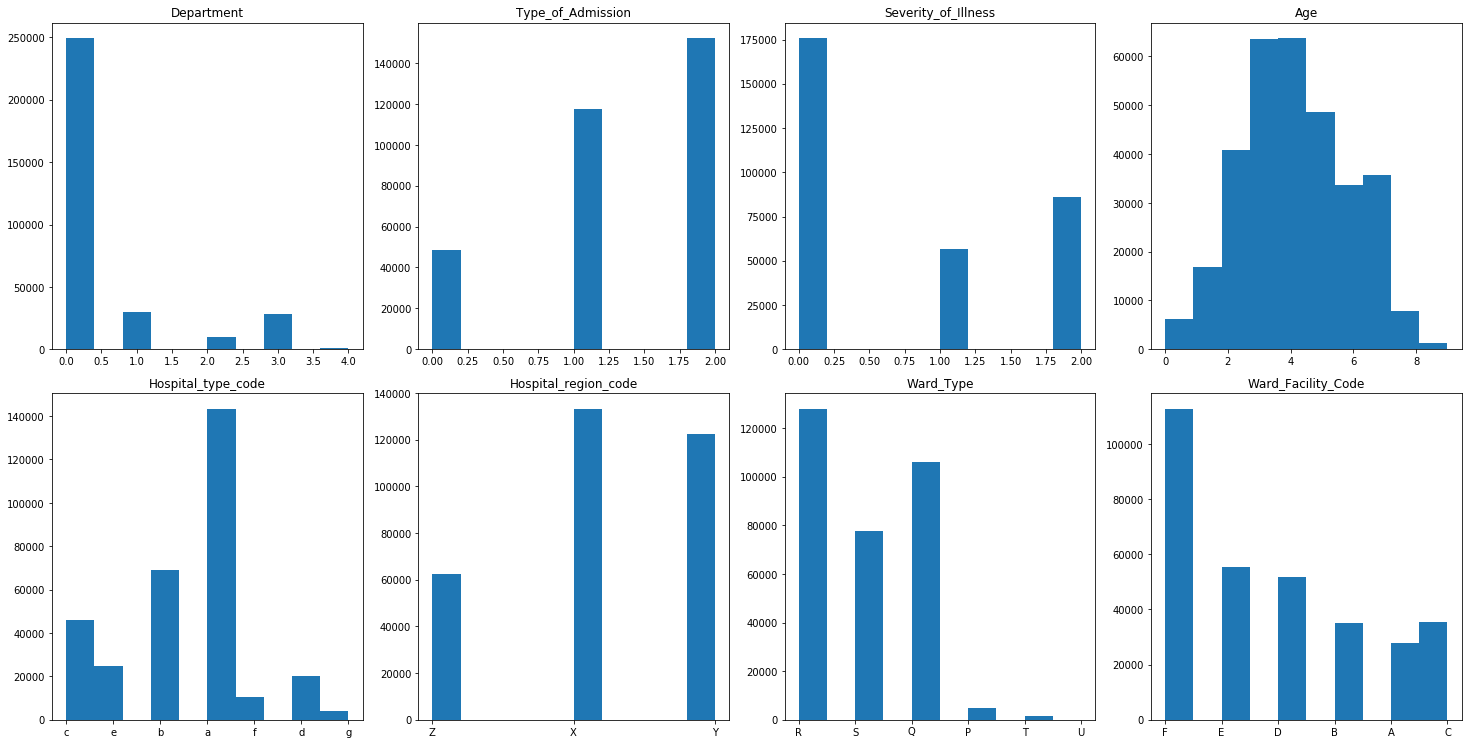

In [278]:
category_train=train.columns[train.dtypes=="category"].tolist()
object_train=train.columns[train.dtypes==object].tolist()
category_train=category_train+object_train
cg_features = list(train[category_train].columns)
sp=1
for columns in cg_features:
    plt.subplot(4,4,sp)
    plt.title(columns)
    plt.hist(train[columns])  
    sp+=1
fig = plt.gcf()
fig.set_size_inches(20.5, 20.5)
plt.tight_layout()

In [279]:
df_test=pd.read_csv("df_test.csv")


In [287]:
final_df=pd.concat((train,df_test),axis=0)
final_df["Age"]=final_df["Age"].astype("category")
final_df["Severity_of_Illness"]=final_df["Severity_of_Illness"].astype("category")
final_df["Department"]=final_df["Department"].astype("category")
final_df["Type_of_Admission"]=final_df["Type_of_Admission"].astype("category")
final_df["Bed Grade"]=final_df["Bed Grade"].astype("category")


In [288]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Hospital_code                      455495 non-null  int64   
 1   Hospital_type_code                 455495 non-null  object  
 2   City_Code_Hospital                 455495 non-null  int64   
 3   Hospital_region_code               455495 non-null  object  
 4   Available Extra Rooms in Hospital  455495 non-null  int64   
 5   Department                         455495 non-null  category
 6   Ward_Type                          455495 non-null  object  
 7   Ward_Facility_Code                 455495 non-null  object  
 8   Bed Grade                          455495 non-null  category
 9   City_Code_Patient                  455495 non-null  float64 
 10  Type_of_Admission                  455495 non-null  category
 11  Severity_of_Illness       

In [289]:
object_final_df=final_df.columns[final_df.dtypes==object].tolist()
category_=final_df.columns[final_df.dtypes=="category"].tolist()
cols=category_train+object_train
cols

['Department',
 'Type_of_Admission',
 'Severity_of_Illness',
 'Age',
 'Hospital_type_code',
 'Hospital_region_code',
 'Ward_Type',
 'Ward_Facility_Code',
 'Hospital_type_code',
 'Hospital_region_code',
 'Ward_Type',
 'Ward_Facility_Code']

In [290]:
final_df=pd.get_dummies(final_df)

In [291]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 54 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      455495 non-null  int64  
 1   City_Code_Hospital                 455495 non-null  int64  
 2   Available Extra Rooms in Hospital  455495 non-null  int64  
 3   City_Code_Patient                  455495 non-null  float64
 4   Visitors with Patient              455495 non-null  int64  
 5   Admission_Deposit                  455495 non-null  float64
 6   Stay                               318438 non-null  float64
 7   Hospital_type_code_a               455495 non-null  uint8  
 8   Hospital_type_code_b               455495 non-null  uint8  
 9   Hospital_type_code_c               455495 non-null  uint8  
 10  Hospital_type_code_d               455495 non-null  uint8  
 11  Hospital_type_code_e               4554